In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, regularizers
from sklearn import preprocessing                                                                                     
from math import sqrt
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt
import math
import tensorflow as tf

E:\Anacoda3 REAL\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def create_model(train_X,n_neurons,loss_function,optimizer_function):
    # design network
    model = Sequential()
 
    # Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 30, return_sequences = True, input_shape = (train_X.shape[1], train_X.shape[2])))
    model.add(Dropout(0.2))
    
    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 30, return_sequences = True))
    model.add(Dropout(0.2))
    
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 30, return_sequences = True))
    model.add(Dropout(0.2))
    
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 30))
    model.add(Dropout(0.2))
    
    # Adding the output layer
    model.add(Dense(units = 1))
    
    model.compile(loss=loss_function, optimizer=optimizer_function)
    
    return model

In [3]:
def data_to_x_y(data,n_in_steps,n_out_steps):
    X_data,y_data=[],[]
    for i in range(0,data.shape[0]-n_in_steps-n_out_steps):
        X_data.append(data[i:i+n_in_steps])
        y_data.append(data[i+n_in_steps+n_out_steps])
    X_data=np.array(X_data)
    y_data=np.array(y_data)
    #X_data=X_data.reshape(X_train.shape[0],X_train.shape[1],1)
    #y_data=y_data.reshape(y_train.shape[0],1)
    return X_data,y_data

In [6]:
def train_test_split(X_data,y_data,train_percentage):
    n_train_intervals = math.ceil(X_data.shape[0] * train_percentage) 
    X_train,y_train=X_data[:n_train_intervals],y_data[:n_train_intervals]
    X_test,y_test=X_data[n_train_intervals:],y_data[n_train_intervals:]
    return X_train,y_train,X_test,y_test

In [10]:
filepath='../dataset/emd_AAPL_2.csv'
df=pd.read_csv(open(filepath))
future_day=30
timestamp=10

In [11]:
minmax_list,df_log_list,X_data_list,y_data_list=[],[],[],[]
X_train_list,y_train_list=[],[]
X_test_list,y_test_list=[],[]
for i in range(df.shape[1]-5,df.shape[1]-1):
    minmax = MinMaxScaler().fit(df.iloc[:, i].values.reshape(-1,1))
    minmax_list.append(minmax)
    df_log = minmax.transform(df.iloc[:, i].values.reshape(-1,1))
    df_log_list.append(df_log)
    X_data,y_data=data_to_x_y(df_log,timestamp,future_day)
    X_data_list.append(X_data)
    y_data_list.append(y_data)
    X_train,y_train,X_test,y_test=train_test_split(X_data,y_data,0.8)
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

In [14]:
n_neurons=6
n_batch=32
n_epochs=60
loss_function='mae'
optimizer_function='adam'

Epoch 1/60
 - 9s - loss: 0.1551
Epoch 2/60
 - 5s - loss: 0.0872
Epoch 3/60
 - 5s - loss: 0.0829
Epoch 4/60
 - 5s - loss: 0.0788
Epoch 5/60
 - 5s - loss: 0.0735
Epoch 6/60
 - 5s - loss: 0.0697
Epoch 7/60
 - 5s - loss: 0.0657
Epoch 8/60
 - 5s - loss: 0.0651
Epoch 9/60
 - 5s - loss: 0.0642
Epoch 10/60
 - 5s - loss: 0.0638
Epoch 11/60
 - 5s - loss: 0.0636
Epoch 12/60
 - 5s - loss: 0.0624
Epoch 13/60
 - 5s - loss: 0.0615
Epoch 14/60
 - 5s - loss: 0.0625
Epoch 15/60
 - 5s - loss: 0.0609
Epoch 16/60
 - 5s - loss: 0.0615
Epoch 17/60
 - 5s - loss: 0.0596
Epoch 18/60
 - 5s - loss: 0.0600
Epoch 19/60
 - 5s - loss: 0.0601
Epoch 20/60
 - 5s - loss: 0.0588
Epoch 21/60
 - 5s - loss: 0.0597
Epoch 22/60
 - 5s - loss: 0.0589
Epoch 23/60
 - 5s - loss: 0.0583
Epoch 24/60
 - 6s - loss: 0.0564
Epoch 25/60
 - 5s - loss: 0.0576
Epoch 26/60
 - 5s - loss: 0.0580
Epoch 27/60
 - 5s - loss: 0.0569
Epoch 28/60
 - 5s - loss: 0.0573
Epoch 29/60
 - 5s - loss: 0.0574
Epoch 30/60
 - 5s - loss: 0.0559
Epoch 31/60
 - 5s -

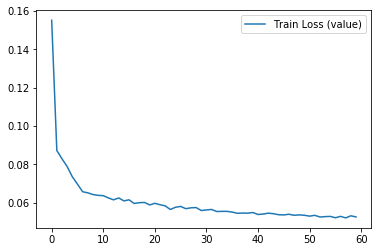

Epoch 1/60
 - 8s - loss: 0.2189
Epoch 2/60
 - 5s - loss: 0.1308
Epoch 3/60
 - 5s - loss: 0.1315
Epoch 4/60
 - 5s - loss: 0.1305
Epoch 5/60
 - 5s - loss: 0.1278
Epoch 6/60
 - 5s - loss: 0.1316
Epoch 7/60
 - 5s - loss: 0.1278
Epoch 8/60
 - 5s - loss: 0.1292
Epoch 9/60
 - 5s - loss: 0.1287
Epoch 10/60
 - 5s - loss: 0.1279
Epoch 11/60
 - 5s - loss: 0.1254
Epoch 12/60
 - 5s - loss: 0.1265
Epoch 13/60
 - 5s - loss: 0.1272
Epoch 14/60
 - 5s - loss: 0.1270
Epoch 15/60
 - 5s - loss: 0.1253
Epoch 16/60
 - 5s - loss: 0.1236
Epoch 17/60
 - 5s - loss: 0.1236
Epoch 18/60
 - 5s - loss: 0.1236
Epoch 19/60
 - 5s - loss: 0.1249
Epoch 20/60
 - 5s - loss: 0.1241
Epoch 21/60
 - 5s - loss: 0.1239
Epoch 22/60
 - 5s - loss: 0.1250
Epoch 23/60
 - 5s - loss: 0.1241
Epoch 24/60
 - 5s - loss: 0.1244
Epoch 25/60
 - 5s - loss: 0.1215
Epoch 26/60
 - 5s - loss: 0.1206
Epoch 27/60
 - 5s - loss: 0.1205
Epoch 28/60
 - 5s - loss: 0.1176
Epoch 29/60
 - 5s - loss: 0.1124
Epoch 30/60
 - 5s - loss: 0.1135
Epoch 31/60
 - 5s -

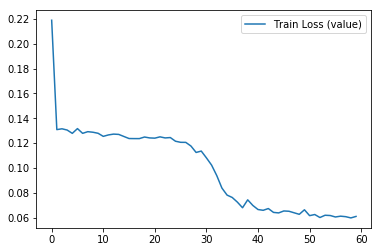

Epoch 1/60
 - 8s - loss: 0.2418
Epoch 2/60
 - 5s - loss: 0.1023
Epoch 3/60
 - 5s - loss: 0.0891
Epoch 4/60
 - 5s - loss: 0.0857
Epoch 5/60
 - 5s - loss: 0.0869
Epoch 6/60
 - 5s - loss: 0.0805
Epoch 7/60
 - 5s - loss: 0.0840
Epoch 8/60
 - 5s - loss: 0.0819
Epoch 9/60
 - 5s - loss: 0.0774
Epoch 10/60
 - 5s - loss: 0.0801
Epoch 11/60
 - 5s - loss: 0.0755
Epoch 12/60
 - 5s - loss: 0.0779
Epoch 13/60
 - 5s - loss: 0.0763
Epoch 14/60
 - 5s - loss: 0.0758
Epoch 15/60
 - 5s - loss: 0.0740
Epoch 16/60
 - 5s - loss: 0.0746
Epoch 17/60
 - 5s - loss: 0.0762
Epoch 18/60
 - 5s - loss: 0.0755
Epoch 19/60
 - 5s - loss: 0.0730
Epoch 20/60
 - 5s - loss: 0.0737
Epoch 21/60
 - 5s - loss: 0.0728
Epoch 22/60
 - 5s - loss: 0.0714
Epoch 23/60
 - 5s - loss: 0.0703
Epoch 24/60
 - 5s - loss: 0.0733
Epoch 25/60
 - 5s - loss: 0.0701
Epoch 26/60
 - 5s - loss: 0.0696
Epoch 27/60
 - 5s - loss: 0.0743
Epoch 28/60
 - 5s - loss: 0.0687
Epoch 29/60
 - 5s - loss: 0.0694
Epoch 30/60
 - 5s - loss: 0.0706
Epoch 31/60
 - 5s -

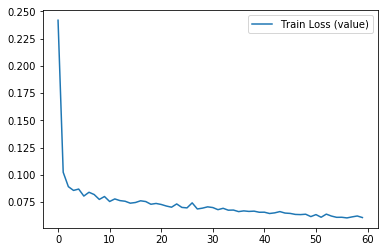

Epoch 1/60
 - 8s - loss: 0.1739
Epoch 2/60
 - 5s - loss: 0.0818
Epoch 3/60
 - 5s - loss: 0.0700
Epoch 4/60
 - 5s - loss: 0.0674
Epoch 5/60
 - 5s - loss: 0.0708
Epoch 6/60
 - 5s - loss: 0.0707
Epoch 7/60
 - 5s - loss: 0.0648
Epoch 8/60
 - 5s - loss: 0.0625
Epoch 9/60
 - 5s - loss: 0.0619
Epoch 10/60
 - 5s - loss: 0.0604
Epoch 11/60
 - 5s - loss: 0.0633
Epoch 12/60
 - 5s - loss: 0.0613
Epoch 13/60
 - 5s - loss: 0.0596
Epoch 14/60
 - 5s - loss: 0.0592
Epoch 15/60
 - 5s - loss: 0.0584
Epoch 16/60
 - 5s - loss: 0.0579
Epoch 17/60
 - 5s - loss: 0.0570
Epoch 18/60
 - 5s - loss: 0.0603
Epoch 19/60
 - 5s - loss: 0.0596
Epoch 20/60
 - 5s - loss: 0.0548
Epoch 21/60
 - 5s - loss: 0.0563
Epoch 22/60
 - 5s - loss: 0.0548
Epoch 23/60
 - 5s - loss: 0.0543
Epoch 24/60
 - 5s - loss: 0.0549
Epoch 25/60
 - 5s - loss: 0.0551
Epoch 26/60
 - 5s - loss: 0.0531
Epoch 27/60
 - 5s - loss: 0.0538
Epoch 28/60
 - 5s - loss: 0.0534
Epoch 29/60
 - 5s - loss: 0.0528
Epoch 30/60
 - 5s - loss: 0.0517
Epoch 31/60
 - 5s -

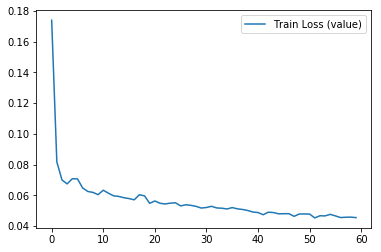

In [16]:
model_list=[]
for i in range(len(X_train_list)):
    x_train=X_train_list[i]
    y_train=y_train_list[i]
    model=create_model(x_train,n_neurons,loss_function,optimizer_function)
    history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=n_batch, 
    verbose=2)
    model_list.append(model)
    model.save('../model/lstm_multi_30step_%d.h5' % i)
    plt.plot(history.history["loss"] , label="Train Loss (%s)" % 'value')
    plt.legend()
    plt.savefig("../image/lstm_multi_30step_trainloss%d.png" % i)
    plt.show()